In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/spotify_songs.csv')

# Display the first few rows of the data
display(data.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [15]:
# valeur null
display(data.isnull().sum())
data = data.dropna()
display(data.isnull().sum())



track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [3]:
# recherche des valeurs aberantes
data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


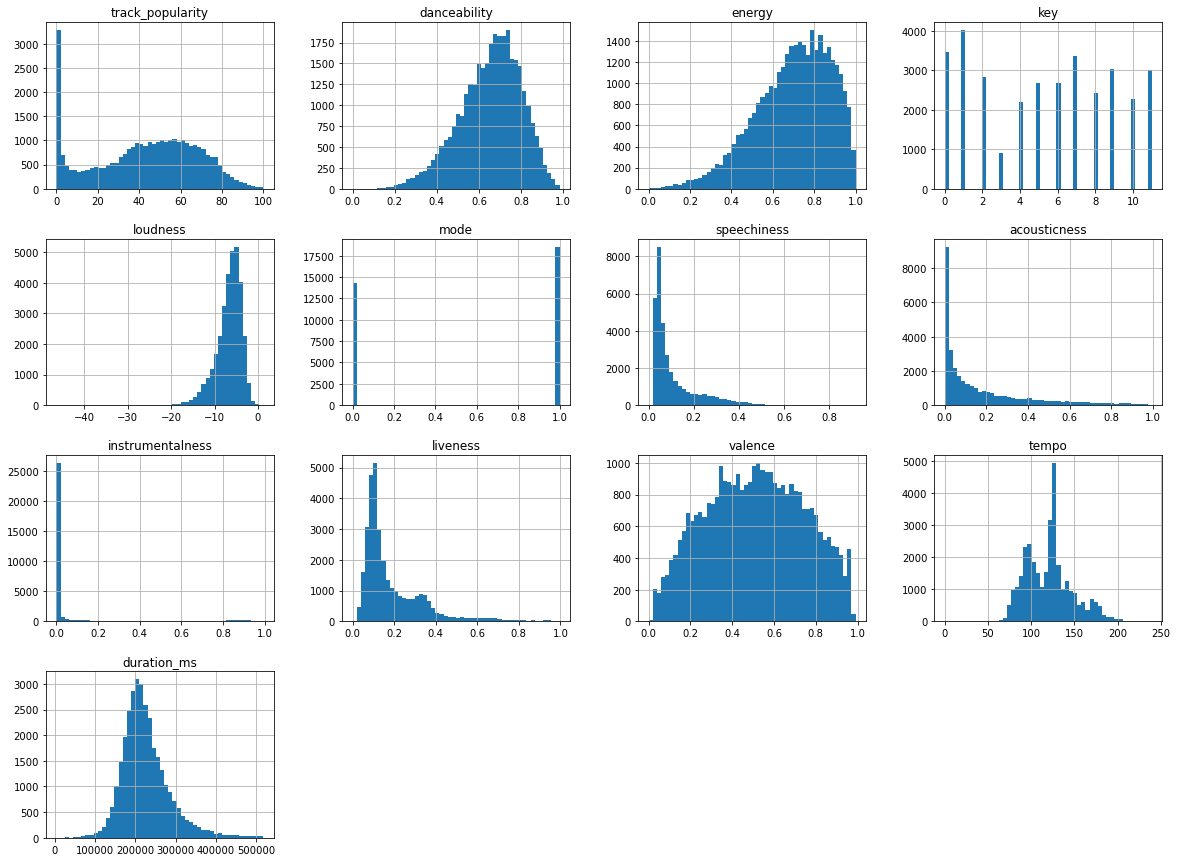

In [4]:
# faire un tableau de bord des histogrammes
data.hist(bins=50, figsize=(20,15))
plt.show()

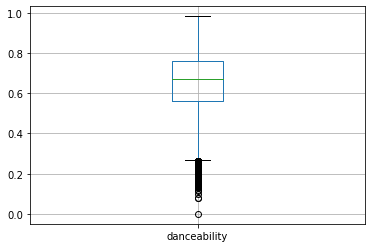

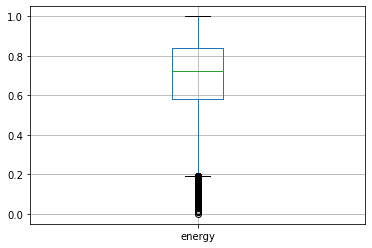

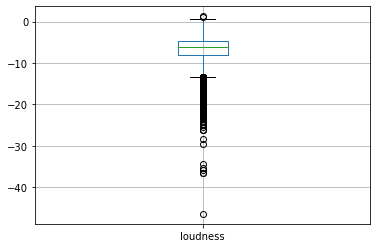

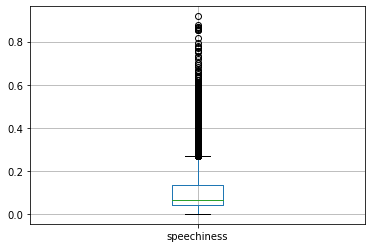

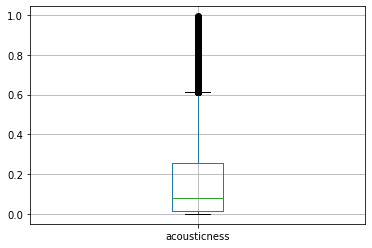

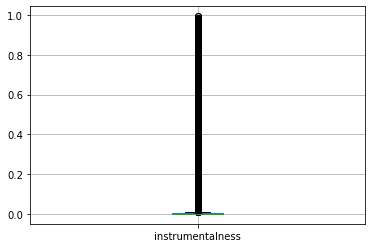

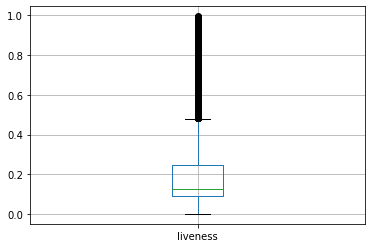

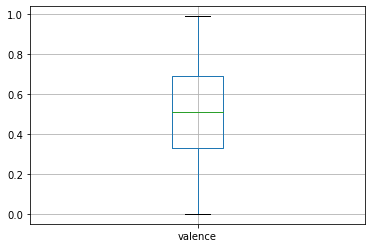

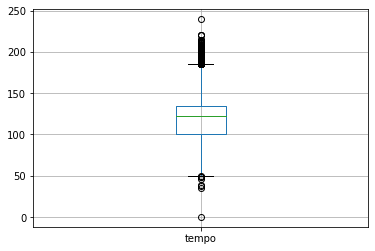

In [5]:
# boite à moustaches
# faire un tableau de boite à moustaches
for col in data.columns:
    if data[col].dtype == 'float64':
        data.boxplot(column=col)
        plt.show()

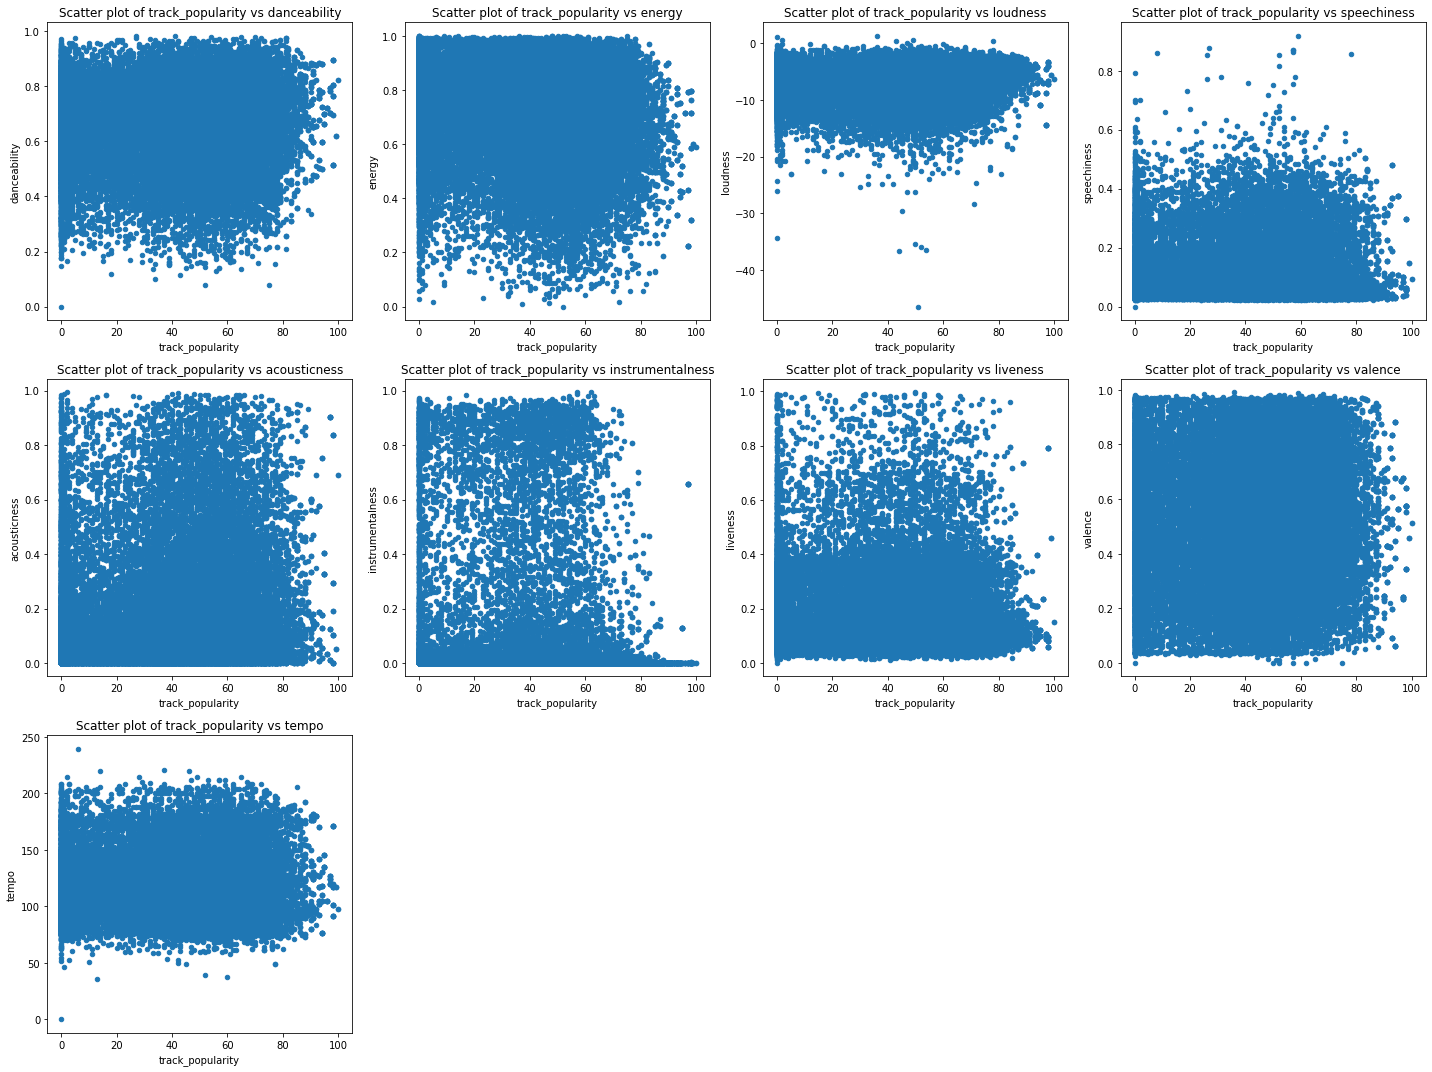

In [13]:
# Diagrammes de dispersion
# faire un tableau de diagrammes de dispersion
num_cols = data.select_dtypes(include=['float64']).columns
num_plots = len(num_cols)
ncols = 4
nrows = (num_plots + ncols - 1) // ncols  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))

for ax, col in zip(axes.flatten(), num_cols):
    data.plot(kind='scatter', x='track_popularity', y=col, ax=ax)
    ax.set_title(f'Scatter plot of track_popularity vs {col}')

# Remove any empty subplots
for i in range(num_plots, nrows*ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [8]:
# Tableau de fréquences des valeurs qualitatives
freq_tables = {}
for col in data.columns:
    if data[col].dtype == 'object':
        freq_tables[col] = data[col].value_counts().reset_index()
        freq_tables[col].columns = [col, 'Frequency']
        display(freq_tables[col])


,track_id,Frequency
0,7BKLCZ1jbUBVqRi2FVlTVw,10
1,14sOS5L36385FJ3OL8hew4,9
2,3eekarcy7kvN4yt5ZFzltW,9
3,2Fxmhks0bxGSBdJ92vM42m,8
4,2tnVG71enUj33Ic2nFN6kZ,8
...,...,...
28351,3AKwyujeGxTQSZNbx9Ka3c,1
28352,3ITvHA9zhZZdBJsOsAUegF,1
28353,5gsW8TMmNVnevjq13h0Nlp,1
28354,4pN4icvWINm9uN3bElfbec,1


,track_name,Frequency
0,Poison,22
1,Breathe,21
2,Alive,20
3,Forever,20
4,Stay,19
...,...,...
23444,Quien Eres Tu,1
23445,Como Nadie,1
23446,Ya No Estás Aquí,1
23447,Ojala,1


,track_artist,Frequency
0,Martin Garrix,161
1,Queen,136
2,The Chainsmokers,123
3,David Guetta,110
4,Don Omar,102
...,...,...
10687,Underworld,1
10688,The Witches,1
10689,Tess Parks,1
10690,Mick Harvey,1


,track_album_id,Frequency
0,5L1xcowSxwzFUSJzvyMp48,42
1,5fstCqs5NpIlF42VhPNv23,29
2,7CjJb2mikwAWA1V6kewFBF,28
3,4VFG1DOuTeDMBjBLZT7hCK,26
4,2HTbQ0RHwukKVXAlTmCZP2,21
...,...,...
22540,7gLNPbL9arQdIl4aj4hBcq,1
22541,7vTkGDm4harI3j80FSvr2p,1
22542,6l9KC46CPYsajHbe3NMK7F,1
22543,7851Vsjv3apS52sXUik6iF,1


,track_album_name,Frequency
0,Greatest Hits,139
1,Ultimate Freestyle Mega Mix,42
2,Gold,35
3,Malibu,30
4,Rock & Rios (Remastered),29
...,...,...
19738,A Mouthful,1
19739,Blonde comme moi,1
19740,Every Second Counts,1
19741,Birdy (Deluxe Version),1


,track_album_release_date,Frequency
0,2020-01-10,270
1,2019-11-22,244
2,2019-12-06,235
3,2019-12-13,220
4,2013-01-01,219
...,...,...
4525,1973-08-28,1
4526,2000-03-23,1
4527,1967-04,1
4528,1968-07-03,1


,playlist_name,Frequency
0,Indie Poptimism,308
1,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,247
2,Permanent Wave,244
3,Hard Rock Workout,219
4,Ultimate Indie Presents... Best Indie Tracks o...,198
...,...,...
444,CSR 103:9 (GTA: SA),7
445,Big White Room-Jessie-J,7
446,TOP 50 GLOBAL 2020 UPDATED WEEKLY 🌍🎶 WORLDWIDE,6
447,ALPAS Music Festival,3


,playlist_id,Frequency
0,4JkkvMpVl4lSioqQjeAL0q,247
1,37i9dQZF1DWTHM4kX49UKs,198
2,6KnQDwp0syvhfHOR4lWP7x,195
3,3xMQTDLOIGvj3lWH5e5x6F,189
4,3Ho3iO0iJykgEQNbjB2sic,182
...,...,...
466,4sr2xEhXQR5VuZ0LZX8TQ8,7
467,6dqoVI7qwYLyNqbg0MPad3,7
468,2CJsD3fcYJWcliEKnwmovU,6
469,6pPpLz42hUkr8gbMirkAEl,3


,playlist_genre,Frequency
0,edm,6043
1,rap,5746
2,pop,5507
3,r&b,5431
4,latin,5155
5,rock,4951


,playlist_subgenre,Frequency
0,progressive electro house,1809
1,southern hip hop,1675
2,indie poptimism,1672
3,latin hip hop,1656
4,neo soul,1637
5,pop edm,1517
6,electro house,1511
7,hard rock,1485
8,gangster rap,1458
9,electropop,1408


In [9]:
# On veut savoir si la combinaison de track_id et album_id est unique
print(data[['track_id']].duplicated().sum())
print(data[['track_id', 'track_album_id']].duplicated().sum())
print(data[['track_id', 'playlist_id']].duplicated().sum())
# when track_id is 5dIgg4mrQHOlVm1ZFYHW29
print(data[(data['track_id'] == '5dIgg4mrQHOlVm1ZFYHW29') & data[['track_id', 'track_album_id', 'playlist_id']].duplicated()].duplicated().sum())
display(data[(data['track_id'] == '5dIgg4mrQHOlVm1ZFYHW29') & data[['track_id', 'track_album_id', 'playlist_id']].duplicated()])
data.drop_duplicates(subset=['track_id', 'track_album_id', 'playlist_id'], inplace=True)
print(data[['track_id', 'playlist_id']].duplicated().sum())

# print tout les doublons
display(data)

4477
4477
582
0


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
15156,5dIgg4mrQHOlVm1ZFYHW29,Smoke on the Water,Deep Purple,44,2J8z3SoDEazEDZIvouXph4,Rhino Hi-Five: Deep Purple,2005-06-21,"Classic Rock 70s 80s 90s, Rock Classics - 70s ...",3Ho3iO0iJykgEQNbjB2sic,rock,...,5,-7.655,0,0.0296,0.134,0.206,0.0951,0.749,114.414,334240


0


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432
